<a href="https://colab.research.google.com/github/Farmhouse121/Adventures-in-Financial-Data-Science/blob/main/2_2_3_Daily_Returns_of_the_S%26P_500_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Installing yfinance and getting the data...")
!pip install yfinance 1>/dev/null
from yfinance import download
import pandas as pd
import numpy as np ;
import matplotlib.pyplot as pl
from statsmodels.base.model import GenericLikelihoodModel
from datetime import datetime
zero,one,two,five,hundred=0e0,1e0,2e0,5e0,1e2 # some friendly numbers
half,GoldenRatio=one/two,(one+np.sqrt(five))/two

# get the daily returns of the S&P 500 
SPX=download('^GSPC','1957-03-01').dropna()
SPX['Return']=SPX['Adj Close'].pct_change()*hundred
SPX.index=pd.DatetimeIndex(SPX.index).to_period('D')
SPX.dropna(inplace=True)
SPX.loc[SPX["Volume"]==0,"Volume"]=np.nan
SPX

Installing yfinance and getting the data...
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
1957-03-04,44.060001,44.060001,44.060001,44.060001,44.060001,1.890000e+06,0.731595
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1.860000e+06,0.363141
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1.840000e+06,0.022610
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1.830000e+06,-0.045219
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1.630000e+06,-0.316669
...,...,...,...,...,...,...,...
2022-03-07,4327.009766,4327.009766,4199.850098,4201.089844,4201.089844,5.506330e+09,-2.951816
2022-03-08,4202.660156,4276.939941,4157.870117,4170.700195,4170.700195,6.237000e+09,-0.723375
2022-03-09,4223.100098,4299.399902,4223.100098,4277.879883,4277.879883,4.220180e+09,2.569825


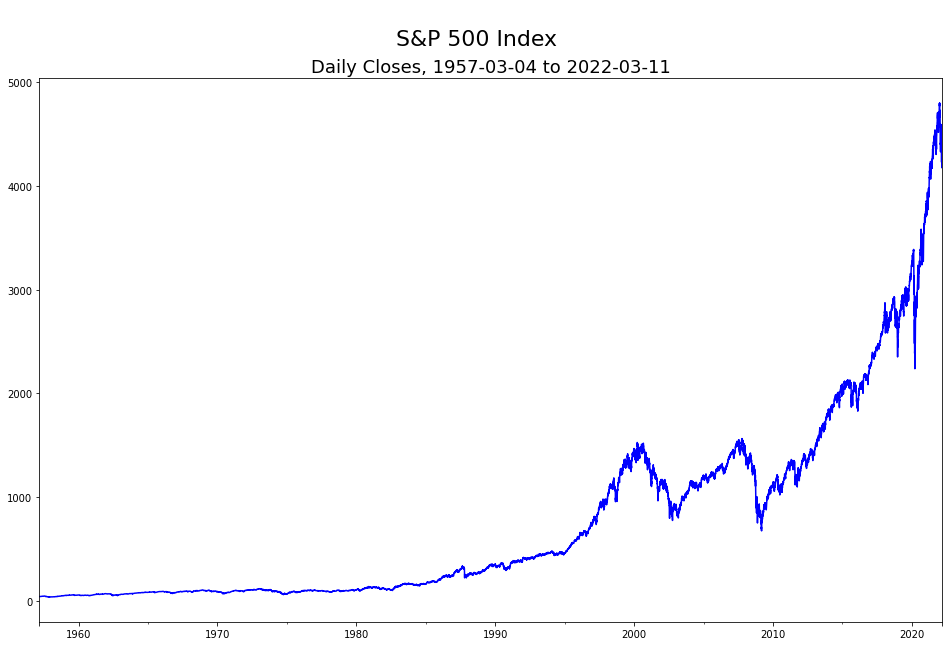

In [ ]:
# Figure 2.1
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
SPX['Adj Close'].plot(ax=plot,color='blue')
figure.suptitle('\nS&P 500 Index',fontsize=22)
plot.set_title('Daily Closes, %s to %s' % (SPX.index[0],SPX.index[-1]),fontsize=18)
plot.set_ylabel(None)
plot.set_xlabel(None);

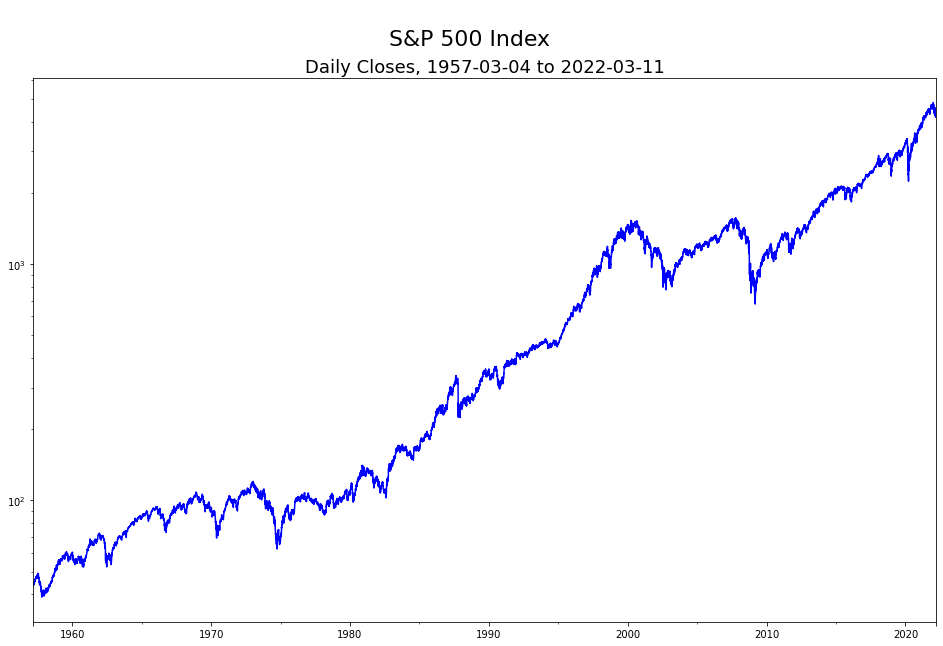

In [ ]:
# Figure 2.2
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
SPX['Adj Close'].plot(ax=plot,color='blue')
figure.suptitle('\nS&P 500 Index',fontsize=22)
plot.set_title('Daily Closes, %s to %s' % (SPX.index[0],SPX.index[-1]),fontsize=18)
plot.set_yscale('log')
plot.set_ylabel(None)
plot.set_xlabel(None);

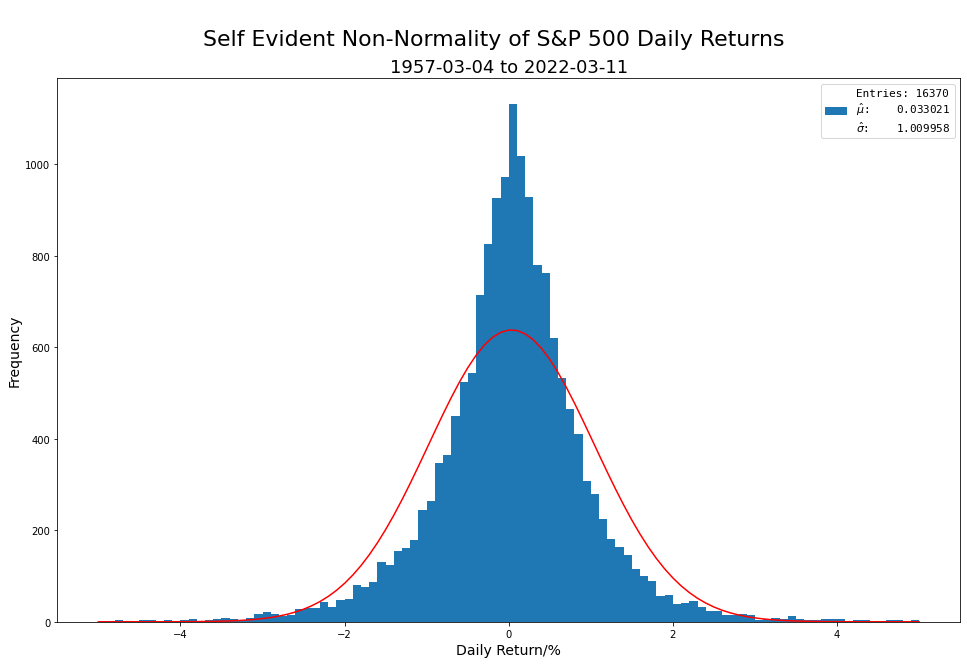

In [ ]:
# Figure 2.3
from scipy.stats import norm
estimates=norm.fit(SPX['Return'])
model=norm(*estimates)
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
samples,bins,patches=plot.hist(SPX['Return'],bins=np.linspace(-5,5,101),label="""Entries: %d
$\\hat{\\mu}$:%12.6f
$\\hat{\\sigma}$:%12.6f""" % (SPX["Return"].count(),estimates[-2],estimates[-1]))
plot.plot(bins,model.pdf(bins)*sum(samples)*(bins[-1]-bins[0])/len(bins),'-r')
plot.set_xlabel("Daily Return/%",fontsize=14)
plot.set_ylabel("Frequency",fontsize=14)
figure.suptitle("\nSelf Evident Non-Normality of S&P 500 Daily Returns",fontsize=22)
plot.set_title("%s to %s" % (SPX.index[0],SPX.index[-1]),fontsize=18)
pl.setp(plot.legend(loc='upper right',fontsize=11).texts,family='monospace');

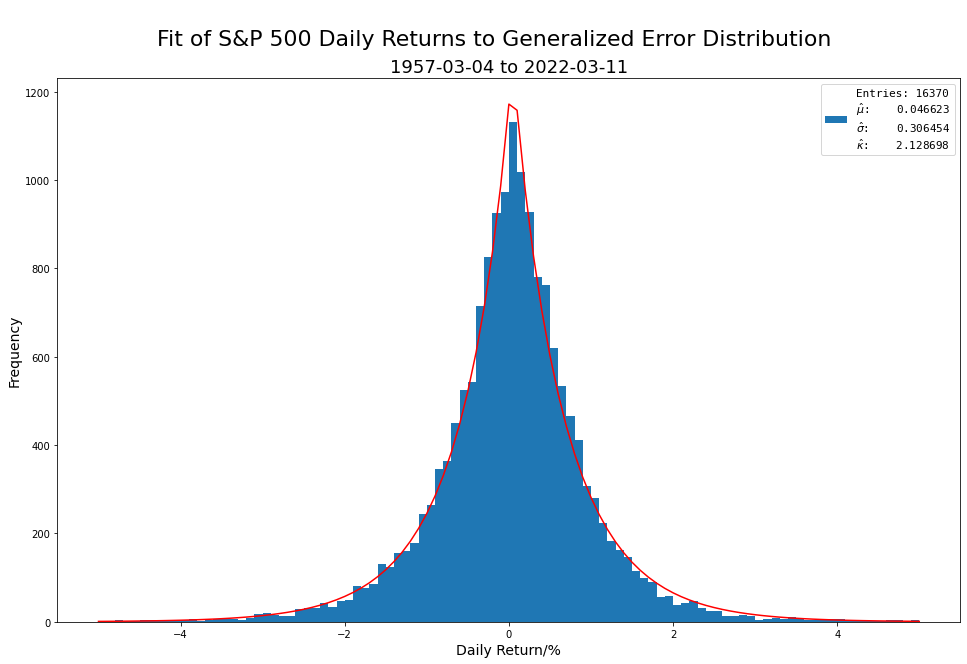

In [ ]:
# Figure 2.4
from scipy.stats import gennorm
estimates=gennorm.fit(SPX['Return'])
model=gennorm(*estimates)
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
samples,bins,patches=plot.hist(SPX['Return'],bins=np.linspace(-5,5,101),label="""Entries: %d
$\\hat{\\mu}$:%12.6f
$\\hat{\\sigma}$:%12.6f
$\\hat{\\kappa}$:%12.6f""" % (SPX["Return"].count(),estimates[-2],estimates[-1]/two,two/estimates[0]))
plot.plot(bins,model.pdf(bins)*sum(samples)*(bins[-1]-bins[0])/len(bins),'-r')
plot.set_xlabel("Daily Return/%",fontsize=14)
plot.set_ylabel("Frequency",fontsize=14)
figure.suptitle("\nFit of S&P 500 Daily Returns to Generalized Error Distribution",fontsize=22)
plot.set_title("%s to %s" % (SPX.index[0],SPX.index[-1]),fontsize=18)
pl.setp(plot.legend(loc='upper right',fontsize=11).texts,family='monospace');